In [1]:
%load_ext jupyter_black

In [2]:
import pandas as pd
import numpy as np

In [29]:
from platform import system

source = ("data\\" if system() == "Windows" else "data/") + "diamonds.csv"

N = 1000

df = (
    pd.read_csv(source)
    .drop(columns=["cut", "color", "clarity", "table", "x", "y", "z"])
    .sample(n=N, random_state=42)
)

print(df.shape)
df.head(8)

(1000, 3)


,carat,depth,price
33553,0.61,61.2,931
9427,0.91,64.1,4744
199,0.77,62.2,2781
12447,1.13,60.7,5531
39489,0.32,63.1,505
42724,0.56,60.6,1743
10822,0.34,61.7,596
49498,0.76,62.7,2668


<Axes: >

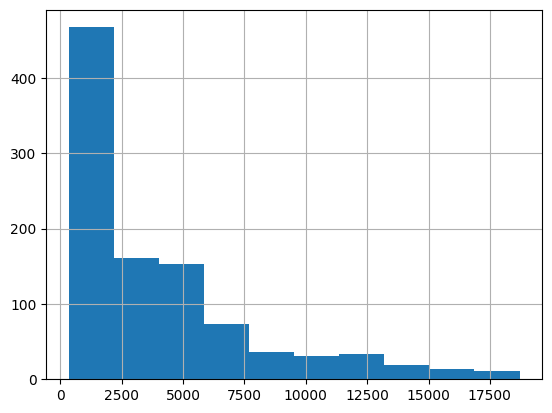

In [66]:
df["price"].hist()

In [76]:
(df.price > 5000).to_numpy()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,

In [30]:
Y = (df - df.mean()) / df.std()

In [31]:
Y.corr()

,carat,depth,price
carat,1.000000,0.015282,0.921672
depth,0.015282,1.000000,-0.026919
price,0.921672,-0.026919,1.000000


In [32]:
df.corr()

,carat,depth,price
carat,1.000000,0.015282,0.921672
depth,0.015282,1.000000,-0.026919
price,0.921672,-0.026919,1.000000


In [33]:
Y = Y.to_numpy()

In [34]:
ds = np.sum(Y * Y)

In [35]:
ds

2997.0

In [36]:
B = np.matmul(Y.T, Y) / N

In [37]:
with np.printoptions(precision=6, suppress=True):
    print(B)

[[ 0.999     0.015267  0.92075 ]
 [ 0.015267  0.999    -0.026892]
 [ 0.92075  -0.026892  0.999   ]]


In [38]:
eigvals, eigvects = np.linalg.eig(B)

In [39]:
L_1 = eigvals[np.argmax(eigvals)]
c_1 = eigvects[:, np.argmax(eigvals)]

In [40]:
with np.printoptions(precision=6, suppress=True):
    print(f"Largest eigenvalue = {L_1},\n its eigenvector = {c_1}")

Largest eigenvalue = 1.9198237949901458,
 its eigenvector = [ 0.706976 -0.008932  0.707181]


In [42]:
z_1 = np.matmul(Y, c_1.reshape((3, 1))) / np.sqrt(N * L_1)

In [43]:
B = B - L_1 * np.matmul(c_1.reshape((1, 3)), c_1.reshape((3, 1)))

In [44]:
eigvals, eigvects = np.linalg.eig(B)

In [45]:
eigvals

array([-4.18914405,  0.07792211,  1.34875056])

In [46]:
L_2 = eigvals[np.argmax(eigvals)]
c_2 = eigvects[:, np.argmax(eigvals)]

In [47]:
L_2

1.3487505602838907

In [48]:
c_2

array([ 0.43980007, -0.76816718,  0.46529032])

In [50]:
z_2 = np.matmul(Y, c_2.reshape((3, 1))) / np.sqrt(N * L_2)

In [52]:
B = B - L_2 * np.matmul(c_2.reshape((1, 3)), c_2.reshape((3, 1)))

In [53]:
eigvals, eigvects = np.linalg.eig(B)

In [54]:
L_3 = eigvals[np.argmax(eigvals)]
c_3 = eigvects[:, np.argmax(eigvals)]

In [56]:
z_3 = np.matmul(Y, c_3.reshape((3, 1))) / np.sqrt(N * L_3)

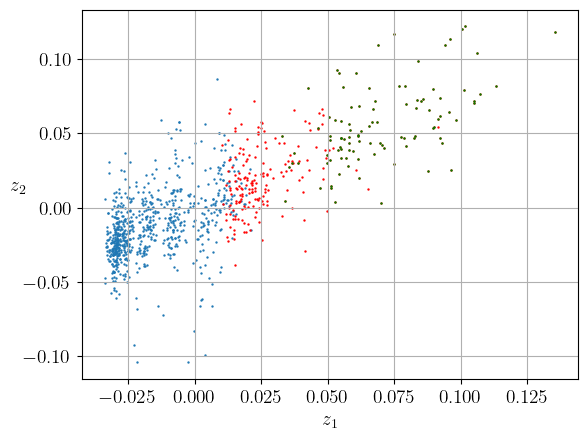

In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt

matplotlib.rcParams.update({"font.size": 14})
mpl.rcParams["text.usetex"] = True

fig, ax = plt.subplots()

ax.scatter(
    z_1[(df.price <= 5000).to_numpy()], z_2[(df.price <= 5000).to_numpy()], s=0.5
)
ax.scatter(
    z_1[(df.price > 5000).to_numpy()], z_2[(df.price > 5000).to_numpy()], s=0.5, c="r"
)
ax.scatter(
    z_1[(df.price > 10000).to_numpy()],
    z_2[(df.price > 10000).to_numpy()],
    s=0.5,
    c="g",
)
ax.grid()
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0)
plt.show()

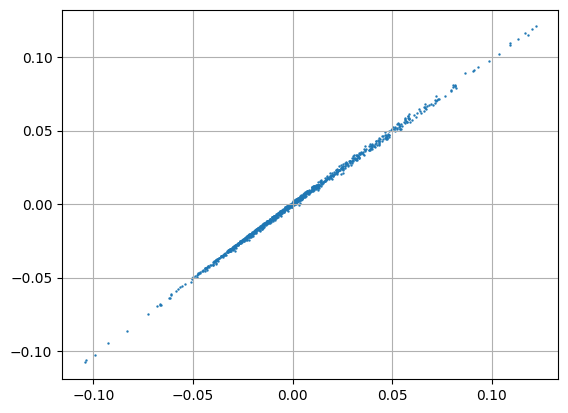

In [58]:
_, ax = plt.subplots()

ax.scatter(z_2, z_3, s=0.5)
ax.grid()

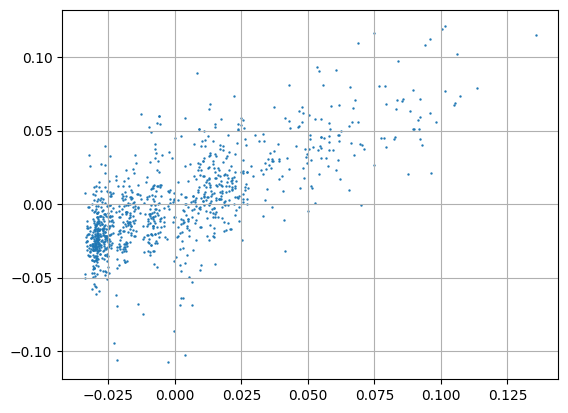

In [59]:
_, ax = plt.subplots()

ax.scatter(z_1, z_3, s=0.5)
ax.grid()

In [61]:
np.linalg.norm(
    Y - np.sqrt(L_1) * np.matmul(z_1.reshape(N, 1), c_1.reshape(1, 3)), ord="fro"
) ** 2

2877.49950582785

In [62]:
np.linalg.norm(
    Y
    - np.sqrt(L_1) * np.matmul(z_1.reshape(N, 1), c_1.reshape(1, 3))
    - np.sqrt(L_2) * np.matmul(z_2.reshape(N, 1), c_2.reshape(1, 3)),
    ord="fro",
) ** 2

2792.911874695407

In [64]:
np.linalg.norm(
    Y
    - np.sqrt(L_1) * np.matmul(z_1.reshape(N, 1), c_1.reshape(1, 3))
    - np.sqrt(L_2) * np.matmul(z_2.reshape(N, 1), c_2.reshape(1, 3))
    - np.sqrt(L_3) * np.matmul(z_3.reshape(N, 1), c_3.reshape(1, 3)),
    ord="fro",
) ** 2

2712.8099357025458

In [63]:
np.linalg.norm(Y) ** 2

2997.0000000000005

In [65]:
np.linalg.norm(
    np.sqrt(L_1) * np.matmul(z_1.reshape(N, 1), c_1.reshape(1, 3))
    + np.sqrt(L_2) * np.matmul(z_2.reshape(N, 1), c_2.reshape(1, 3))
    + np.sqrt(L_3) * np.matmul(z_3.reshape(N, 1), c_3.reshape(1, 3)),
    ord="fro",
) ** 2

10.482502570576328